In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import calendar
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# import data
df = pd.read_csv("../data/AQI.csv")

In [3]:
df

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
22518,2025-12-11,United Kingdom of Great Britain and Northern I...,Moderate,58
22519,2025-12-11,United States of America,Moderate,94
22520,2025-12-11,Uzbekistan,Good,5
22521,2025-12-11,Vatican,Unhealthy for Sensitive Groups,107


In [4]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22523 entries, 0 to 22522
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       22523 non-null  object
 1   Country    22523 non-null  object
 2   Status     22523 non-null  object
 3   AQI Value  22523 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 704.0+ KB


In [5]:
# no 
df["AQI Value"].isna().sum(axis=0)

np.int64(0)

In [6]:
df["Status"].unique()

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [7]:
df["Country"].unique()

array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Grenada', 'Guadeloupe', 'Guam',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 

In [8]:
_namecountry = "India"

In [9]:
def DataProcess(data):
    data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
    return data

In [13]:
def DataPipeline(countryname, data):
    data_update = DataProcess(data)
    data_chunk = data_update[data_update["Country"]==countryname].sort_values(by="Date", ascending=True)
    data_chunk["Year"] = data_chunk["Date"].dt.year
    data_yearly_trend = data_chunk.groupby(["Year"]).agg(AQI = ("AQI Value", "mean"))
    chunk_df = data_chunk[["Year", "Month", "AQI Value"]].sort_values(by="Year", ascending=True)
    col_names = [calendar.month_name[x] for x in range(1, 13)] 
    col_years = [2022, 2023, 2024, 2025]
    aqi_avg = []
    for cy in col_years:
        aqi_avg_yr = []
        for cm in col_names:
            year_month = chunk_df[(chunk_df["Year"]==cy) & (chunk_df["Month"]==cm)]
            if len(year_month)==0:
                aqi_avg_yr.append(0)
            else:
                aqi_avg_yr.append(float(year_month["AQI Value"].mean()))
    aqi_avg.append(aqi_avg_yr)
    return data_yearly_trend, aqi_avg_yr

In [9]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

In [15]:
type(df["Date"].iloc[0])==pd._libs.tslibs.timestamps.Timestamp

True

In [18]:
assert "Status" in df.columns

In [11]:
DataPipeline("India", df)

,AQI
Year,
2022,175.000000
2023,215.272727
2024,286.290323
2025,269.200000


In [10]:
df_countrywise = df[df["Country"]=='India'].sort_values(by="Date", ascending=True)

In [11]:
df_countrywise["Year"] = df_countrywise["Date"].dt.year

In [127]:
df_countrywise

,Date,Country,Status,AQI Value,Year
59,2022-07-21,India,Unhealthy,162,2022
201,2022-07-21,India,Unhealthy,162,2022
343,2022-07-22,India,Very Unhealthy,226,2022
484,2022-07-22,India,Unhealthy,160,2022
625,2022-07-22,India,Unhealthy,153,2022
...,...,...,...,...,...
22007,2025-11-13,India,Hazardous,445,2025
22118,2025-11-20,India,Hazardous,566,2025
22229,2025-11-27,India,Hazardous,422,2025
22342,2025-12-04,India,Hazardous,572,2025


In [128]:
df_coun_yrw = df_countrywise.groupby(["Year"]).agg(AQI = ("AQI Value", "mean"))

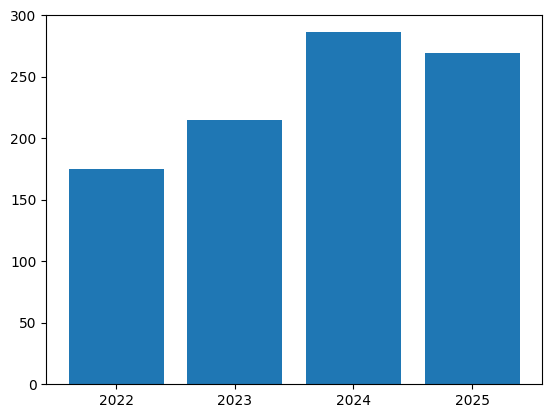

In [129]:
plt.bar([str(x) for x in df_coun_yrw.index], df_coun_yrw["AQI"])
plt.show()

In [130]:
df_countrywise["Month"] = [calendar.month_name[x] for x in df_countrywise["Date"].dt.month]

In [36]:
df["Status"].unique()

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [58]:
df_countrywise

,Date,Country,Status,AQI Value,Year,Month
60,2022-07-21,Indonesia,Moderate,93,2022,July
202,2022-07-21,Indonesia,Moderate,93,2022,July
344,2022-07-22,Indonesia,Moderate,93,2022,July
485,2022-07-22,Indonesia,Moderate,93,2022,July
626,2022-07-22,Indonesia,Moderate,93,2022,July
...,...,...,...,...,...,...
22008,2025-11-13,Indonesia,Moderate,100,2025,November
22119,2025-11-20,Indonesia,Moderate,94,2025,November
22230,2025-11-27,Indonesia,Moderate,85,2025,November
22343,2025-12-04,Indonesia,Unhealthy for Sensitive Groups,144,2025,December


In [131]:
df_coun_mon = df_countrywise[["Year", "Month", "AQI Value"]].sort_values(by="Year", ascending=True)

In [132]:
col_names = [calendar.month_name[x] for x in range(1, 13)] 
col_years = [2022, 2023, 2024, 2025]

In [133]:
aqi_avg = []

In [134]:
for cy in col_years:
    aqi_avg_yr = []
    for cm in col_names:
        year_month = df_coun_mon[(df_coun_mon["Year"]==cy) & (df_coun_mon["Month"]==cm)]
        if len(year_month)==0:
            aqi_avg_yr.append(0)
        else:
            aqi_avg_yr.append(float(year_month["AQI Value"].mean()))
    aqi_avg.append(aqi_avg_yr)

In [135]:
df_m = pd.DataFrame(data=aqi_avg, index = col_years, columns=col_names)

In [136]:
df_m

,January,February,March,April,May,June,July,August,September,October,November,December
2022,0.0,0.00,0.0,0.00,0.0,0.0,158.5,186.656250,170.26087,0.0,0.00,0.0
2023,332.0,0.00,172.0,224.00,243.5,252.8,155.0,159.333333,0.00000,0.0,0.00,0.0
2024,0.0,0.00,0.0,0.00,0.0,399.0,217.0,164.200000,180.25000,251.2,450.00,353.5
2025,301.6,206.75,290.5,227.75,373.4,185.5,149.0,155.250000,216.00000,291.6,461.25,455.0


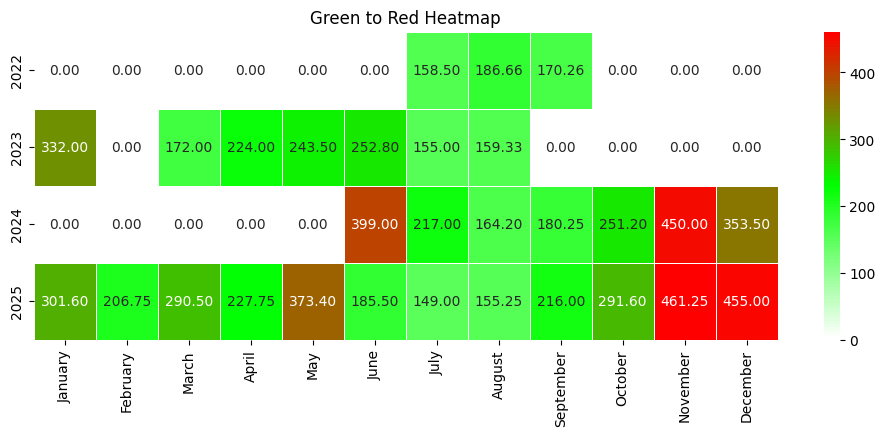

In [139]:
plt.figure(figsize=(12, 4))
sns.heatmap(df_m, cmap = cm, annot=True, fmt=".2f", linewidths=.5)
plt.title('Green to Red Heatmap')
plt.show()

In [14]:
# function

In [15]:
def DataPipeline(countryname, data):
    data_update = DataProcess(data)
    data_chunk = data_update[data_update["Country"]==countryname].sort_values(by="Date", ascending=True)
    data_chunk["Year"] = data_chunk["Date"].dt.year
    data_yearly_trend = data_chunk.groupby(["Year"]).agg(AQI = ("AQI Value", "mean"))
    chunk_df = data_chunk[["Year", "Month", "AQI Value"]].sort_values(by="Year", ascending=True)
    col_names = [calendar.month_name[x] for x in range(1, 13)] 
    col_years = [2022, 2023, 2024, 2025]
    aqi_avg = []
    for cy in col_years:
        aqi_avg_yr = []
        for cm in col_names:
            year_month = chunk_df[(chunk_df["Year"]==cy) & (chunk_df["Month"]==cm)]
            if len(year_month)==0:
                aqi_avg_yr.append(0)
            else:
                aqi_avg_yr.append(float(year_month["AQI Value"].mean()))
    aqi_avg.append(aqi_avg_yr)
    return data_yearly_trend, aqi_avg_yr